In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset_Facebook.csv", sep=";" )
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
Type = pd.get_dummies(df['Type'], prefix="Type")
Cetegory = pd.get_dummies(df['Category'], prefix="Category")
Month = pd.get_dummies(df['Post Month'], prefix="Month")
Day = pd.get_dummies(df['Post Weekday'], prefix="Day")
Hour = pd.get_dummies(df['Post Hour'], prefix="Hour")
Paid = pd.get_dummies(df['Paid'], prefix="Paid")

df.drop(['Type','Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid'], axis=1, inplace=True)
df.shape

(500, 13)

In [4]:

df.iloc[:,0] = (df.iloc[:,0] - df.iloc[:,0].min()) / (df.iloc[:,0].max() - df.iloc[:,0].min())
#df.iloc[:,1] = (df.iloc[:,1] - df.iloc[:,1].min()) / (df.iloc[:,1].max() - df.iloc[:,1].min())
df.iloc[:,2] = (df.iloc[:,2] - df.iloc[:,2].min()) / (df.iloc[:,2].max() - df.iloc[:,2].min())
df.iloc[:,3] = (df.iloc[:,3] - df.iloc[:,3].min()) / (df.iloc[:,3].max() - df.iloc[:,3].min())
df.iloc[:,4] = (df.iloc[:,4] - df.iloc[:,4].min()) / (df.iloc[:,4].max() - df.iloc[:,4].min())
df.iloc[:,5] = (df.iloc[:,5] - df.iloc[:,5].min()) / (df.iloc[:,5].max() - df.iloc[:,5].min())
df.iloc[:,6] = (df.iloc[:,6] - df.iloc[:,6].min()) / (df.iloc[:,6].max() - df.iloc[:,6].min())
df.iloc[:,7] = (df.iloc[:,7] - df.iloc[:,7].min()) / (df.iloc[:,7].max() - df.iloc[:,7].min())
df.iloc[:,8] = (df.iloc[:,8] - df.iloc[:,8].min()) / (df.iloc[:,8].max() - df.iloc[:,8].min())
df.iloc[:,9] = (df.iloc[:,9] - df.iloc[:,9].min()) / (df.iloc[:,9].max() - df.iloc[:,9].min())
df.iloc[:,10] = (df.iloc[:,10] - df.iloc[:,10].min()) / (df.iloc[:,10].max() - df.iloc[:,10].min())
df.iloc[:,11] = (df.iloc[:,11] - df.iloc[:,11].min()) / (df.iloc[:,11].max() - df.iloc[:,11].min())
df.iloc[:,12] = (df.iloc[:,12] - df.iloc[:,12].min()) / (df.iloc[:,12].max() - df.iloc[:,12].min())

In [5]:
df.head()

,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,1.0,2752,0.004074,0.014769,0.008835,0.007587,0.002268,0.027411,0.025189,0.010753,0.015275,0.021519,0.015788
1,1.0,10460,0.016659,0.126540,0.119445,0.084219,0.010064,0.114721,0.251660,0.013441,0.025135,0.036709,0.025892
2,1.0,2413,0.003427,0.014681,0.009188,0.007334,0.002028,0.024736,0.028166,0.000000,0.012761,0.017722,0.012630
3,1.0,50128,0.078778,0.192432,0.068999,0.056146,0.054603,0.621086,0.315319,0.155914,0.303944,0.186076,0.280549
4,1.0,7244,0.011736,0.057852,0.035427,0.028882,0.005113,0.057868,0.088619,0.051075,0.062838,0.062025,0.062046


In [6]:
df = pd.concat([df, Type, Cetegory, Month, Day, Hour, Paid], axis=1)
df.shape

(500, 63)

In [7]:
train, validation, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [8]:
X = np.array(train.drop('Lifetime Post Total Reach',axis=1))
y = np.array(train.iloc[:,1])
#y = np.reshape(y, (300,1))

Xval = np.array(validation.drop('Lifetime Post Total Reach',axis=1))
yval = np.array(validation.iloc[:,1])
#yval = np.reshape(yval, (-1,1))

Xtest = np.array(test.drop('Lifetime Post Total Reach',axis=1))
ytest = np.array(test.iloc[:,1])
#ytest = np.reshape(ytest, (-1,1))

X[np.isnan(X)] = 0
Xval[np.isnan(Xval)] = 0
Xtest[np.isnan(Xtest)] = 0
y[np.isnan(y)] = 0
yval[np.isnan(yval)] = 0
ytest[np.isnan(ytest)] = 0

In [9]:
N = len(X)
Nval = len(Xval)
Ntest = len(Xtest)

In [10]:
# Functions

def sigmoid(H):
    return 1 / (1 + np.exp(-H))

def ReLU(X):
    return X * (X > 0)

def feed_forward(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.tanh(np.matmul(X, W1) + b1)
    Z2 = ReLU(np.matmul(Z1, W2) + b2)
    y_hat = np.matmul(Z2, W3) + b3
    return Z1, Z2, y_hat

def OLS(y, y_hat):
    return np.matmul((y - y_hat).T, y - y_hat)[0, 0]

def r_squared(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

## Linear Regression

In [ ]:
def OLS_MLR(y, y_hat):
    return (1/(2*N))*(y - y_hat).dot(y - y_hat)

PHI = np.column_stack((np.array([1]*N), X))
PHIval = np.column_stack((np.array([1]*Nval), Xval))
PHItest= np.column_stack((np.array([1]*Ntest), Xtest))

In [ ]:
# Fit the Model

w = np.random.randn(63)

J = []
eta = 1e-1
epochs = int(1e5)
Jval = []
Rtrain = []
Rval = []

for t in range(epochs):
    y_hat = PHI.dot(w)
    J.append(OLS_MLR(y, y_hat))
    w -= eta * (1/N) * PHI.T.dot((y_hat - y))
    
Rtrain.append(r_squared(y, y_hat))
y_hatval = PHIval.dot(w)
Rval.append(r_squared(yval, y_hatval))
    
plt.figure(figsize = (12, 9))
plt.plot(J)

In [ ]:
print("R-squared training: {}".format(Rtrain))
print("R-squared validation: {}".format(Rval))

In [ ]:
y_hattest = PHItest.dot(w)
r_squared(ytest, y_hattest)

## Deep Learning Regression

In [11]:
y = np.reshape(y, (300,1))
yval = np.reshape(yval, (-1,1))
ytest = np.reshape(ytest, (-1,1))
D = 62
Q = 65
R = 45
K = 1

W1 = np.random.randn(D, Q)
b1 = np.random.randn(Q)
W2 = np.random.randn(Q, R)
b2 = np.random.randn(R)
W3 = np.random.randn(R, K)
b3 = np.random.randn(K)


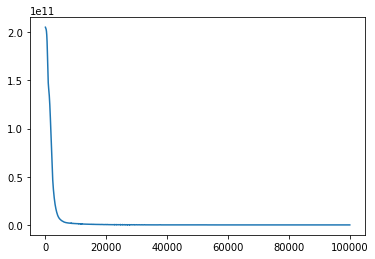

In [33]:
# Train the model

J = []
Rtrain = []
Rval = []
Rtest = []
Jtrain = []
Jval = []
eta = 1e-10
epochs = int(1e5)


'''for r in range(10):#np.linspace(0,10,11):
    for q in range(10):#np.linspace(0,10,11):
Q = int(q)
R = int(r)'''
W1 = np.random.randn(D, Q)
b1 = np.random.randn(Q)
W2 = np.random.randn(Q, R)
b2 = np.random.randn(R)
W3 = np.random.randn(R, K)
b3 = np.random.randn(K)


for t in range(epochs):
    Z1 = np.tanh(np.matmul(X, W1) + b1)
    Z2 = ReLU(np.matmul(Z1, W2) + b2)
    y_hat = np.matmul(Z2, W3) + b3
    J.append(OLS(y, y_hat))

    dH3 = y_hat - y
    dW3 = np.matmul(Z2.T, dH3)
    W3 -= eta * dW3
    b3 -= eta * dW3.sum(axis = 0)

    dZ2 = np.matmul(dH3, W3.T)
    dH2 = dZ2 * (Z2 > 0)
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta * dW2
    b2 -= eta * dW2.sum(axis = 0)

    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1 * (1 - Z1*Z1)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta * dW1
    b1 -= eta * dW1.sum(axis = 0)

y_hatval = feed_forward(Xval, W1, b1, W2, b2, W3, b3)[-1]
y_hattest = feed_forward(Xtest, W1, b1, W2, b2, W3, b3)[-1]
Jval.append(1/Nval * OLS(yval,y_hatval)) 
Rtrain.append(r_squared(y, y_hat)) 
Rval.append(r_squared(yval, y_hatval))
Rtest.append(r_squared(ytest,y_hattest))

Jtrain.append(J[-1]) 




plt.plot(J)

In [34]:
print(Rtrain, Rval, Rtest)

[0.9999893019868712] [0.6115724138444959] [0.43963490869174693]


In [17]:
Jval = [1/Nval * OLS(yval,y_hatval)]
Jtrain_l2 = [J[-1]]
Jval_l2 = [1/Nval * OLS(yval,y_hatval)]
Jtrain_l1 = [J[-1]]
Jval_l1 = [1/Nval * OLS(yval,y_hatval)]

## L1 Regularization

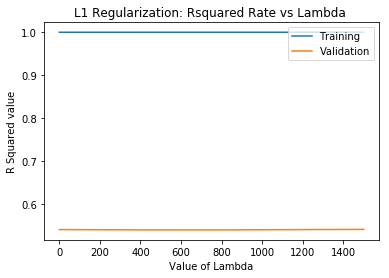

In [36]:
np.random.seed(111)
Rtrain_l1 = []
Rval_l1 = []
Rtest_l1 = []
Jtrain_l1 = []
Jval_l1 = []
eta = 1e-10
epochs = int(1e5)
W1_l1 = np.random.randn(D, Q)
b1_l1 = np.random.randn(Q)
W2_l1 = np.random.randn(Q, R)
b2_l1 = np.random.randn(R)
W3_l1 = np.random.randn(R, K)
b3_l1 = np.random.randn(K)
L2 = np.linspace(0,1500,5)
for i in L2:
    lmbda = i

    for t in range(epochs):

        Z1_l1 = np.tanh(np.matmul(X, W1_l1) + b1_l1)
        Z2_l1 = ReLU(np.matmul(Z1_l1, W2_l1) + b2_l1)
        y_hat_l1 = np.matmul(Z2_l1, W3_l1) + b3_l1
        J.append(OLS(y, y_hat_l1))

        dH3_l1 = y_hat_l1-y
        dW3_l1 = np.matmul(Z2_l1.T, dH3_l1)
        W3_l1 -= eta * (dW3_l1 + lmbda*np.sign(W3_l1))
        b3_l1 -= eta * (dW3_l1+lmbda*np.sign(W3_l1)).sum(axis = 0)

        dZ2_l1 = np.matmul(dH3_l1, W3_l1.T)
        dH2_l1 = dZ2_l1 * (Z2_l1 > 0)
        dW2_l1 = np.matmul(Z1_l1.T, dH2_l1)
        W2_l1 -= eta * (dW2_l1 + (lmbda*np.sign(W2_l1)))
        b2_l1 -= eta * (dW2_l1+ lmbda*np.sign(W2_l1)).sum(axis = 0)

        dZ1_l1 = np.matmul(dH2_l1, W2_l1.T)
        dH1_l1 = dZ1_l1 * (1 - Z1_l1*Z1_l1)
        dW1_l1 = np.matmul(X.T, dH1_l1)
        W1_l1 -= eta * (dW1_l1 + lmbda*np.sign(W1_l1))
        b1_l1 -= eta * (dW1_l1+lmbda*np.sign(W1_l1)).sum(axis = 0)
        
        
        
    y_hatval_l1 = feed_forward(Xval, W1_l1, b1_l1, W2_l1, b2_l1, W3_l1, b3_l1)[-1]
    y_hattest_l1 = feed_forward(Xtest, W1_l1, b1_l1, W2_l1, b2_l1, W3_l1, b3_l1)[-1]
    Rtrain_l1.append(r_squared(y, y_hat_l1)) 
    Rval_l1.append(r_squared(yval, y_hatval_l1))
    Rtest_l1.append(r_squared(ytest,y_hattest_l1))
    Jtrain_l1.append(1/N * OLS(y,y_hat_l1)) 
    Jval_l1.append(1/Nval * OLS(yval,y_hatval_l1)) 
       


    
plt.plot(L2, Rtrain_l1, label='Training')
plt.plot(L2, Rval_l1, label='Validation')
plt.title("L1 Regularization: Rsquared Rate vs Lambda ")
plt.xlabel("Value of Lambda")
plt.ylabel("R Squared value")
plt.legend(loc='upper right')

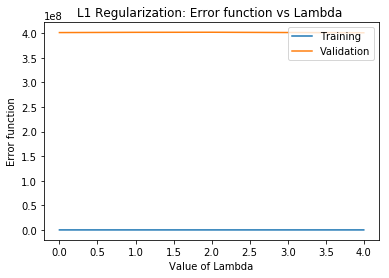

In [30]:
plt.plot(L2, Jtrain_l1, label='Training')
plt.plot(L2, Jval_l1, label='Validation')
plt.title("L1 Regularization: Error function vs Lambda ")
plt.xlabel("Value of Lambda")
plt.ylabel("Error function")
plt.legend(loc='upper right')

In [31]:
d2 = {'Train': Jtrain_l1, 'Validation': Jval_l1}
J_l1 = pd.DataFrame(data=d2)
J_l1

,Train,Validation
0,2263.517227,4.012238e+08
1,1674.669580,4.017256e+08
2,1018.763278,4.018966e+08
3,1789.573386,4.013223e+08
4,926.472668,4.008532e+08


In [32]:
d = {'Train': Rtrain_l1, 'Validation': Rval_l1, 'Test': Rtest_l1}
Rsquared = pd.DataFrame(data=d)
Rsquared

,Train,Validation,Test
0,0.999995,0.539846,0.516441
1,0.999996,0.539271,0.512477
2,0.999998,0.539075,0.510078
3,0.999996,0.539733,0.510155
4,0.999998,0.540271,0.509262
